# Author: Rimjhim Singh

## The Sparks Foundation


### Task 7: Stock Market Prediction using Numerical and Textual Analysis

### Step 1: Importing the libraries

In [101]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost 
import seaborn as sns
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rimjhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rimjhim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Step 2 : Importing the Dataset 1 and Exploratory data analysis

In [2]:
# Dataframe for exploratory analysis (Numerical Dataset)
df=pd.read_csv("D:/rimjhim/The Sparks Foundation Internship/Task 7/^BSESN.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [4]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0
251,2020-12-17,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,0.0


In [5]:
df.describe

<bound method NDFrame.describe of            Date          Open          High           Low         Close  \
0    2019-12-17  41052.359375  41401.648438  41005.179688  41352.171875   
1    2019-12-18  41442.750000  41614.769531  41358.468750  41558.570313   
2    2019-12-19  41571.820313  41719.289063  41456.398438  41673.921875   
3    2019-12-20  41746.199219  41809.960938  41636.109375  41681.539063   
4    2019-12-23  41548.261719  41701.621094  41474.609375  41642.660156   
..          ...           ...           ...           ...           ...   
247  2020-12-11  46060.320313  46309.628906  45706.218750  46099.011719   
248  2020-12-14  46284.699219  46373.339844  45951.531250  46253.460938   
249  2020-12-15  46287.390625  46350.300781  45841.671875  46263.171875   
250  2020-12-16  46573.308594  46704.968750  46402.199219  46666.460938   
251  2020-12-17  46774.320313  46992.570313  46627.601563  46890.339844   

        Adj Close   Volume  
0    41352.171875  19000.0  
1    41

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Checking for null values in the dataset

In [8]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [10]:
len(df)

252

In [11]:
df.shape

(252, 7)

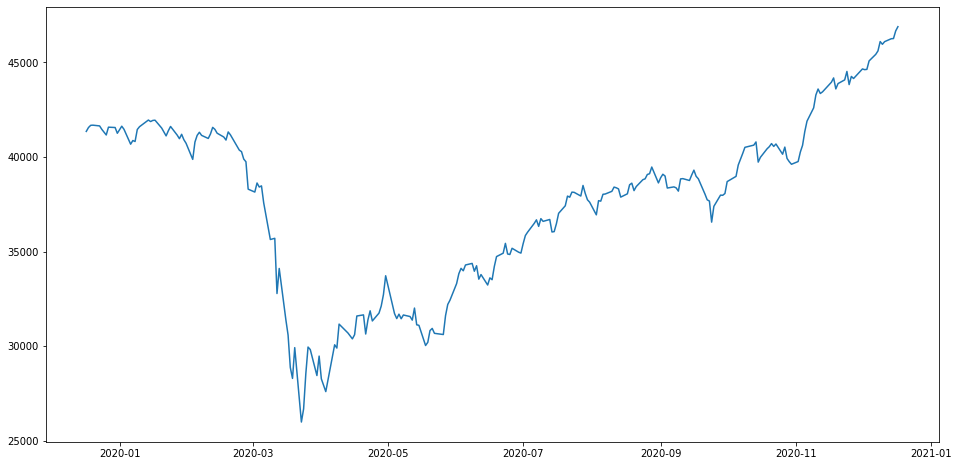

In [12]:
#Plot closing stock price with respect to time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

<AxesSubplot:>

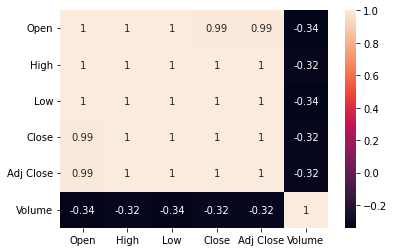

In [13]:
sns.heatmap(df.corr(),annot=True)

C:\Users\Rimjhim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open', ylabel='Close'>

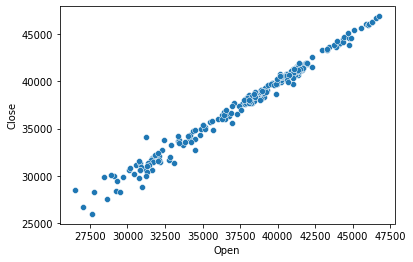

In [14]:
sns.scatterplot(df['Open'],df['Close'])

C:\Users\Rimjhim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close', ylabel='Date'>

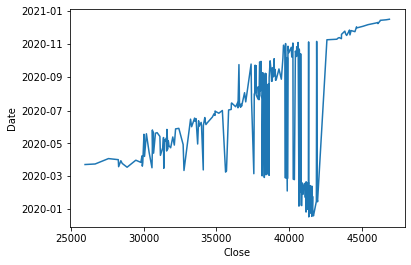

In [180]:
sns.lineplot( df['Close'], df['Date'])

C:\Users\Rimjhim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

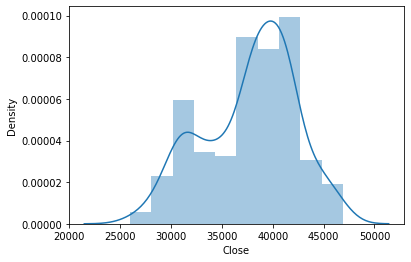

In [181]:
sns.distplot( df['Close'])

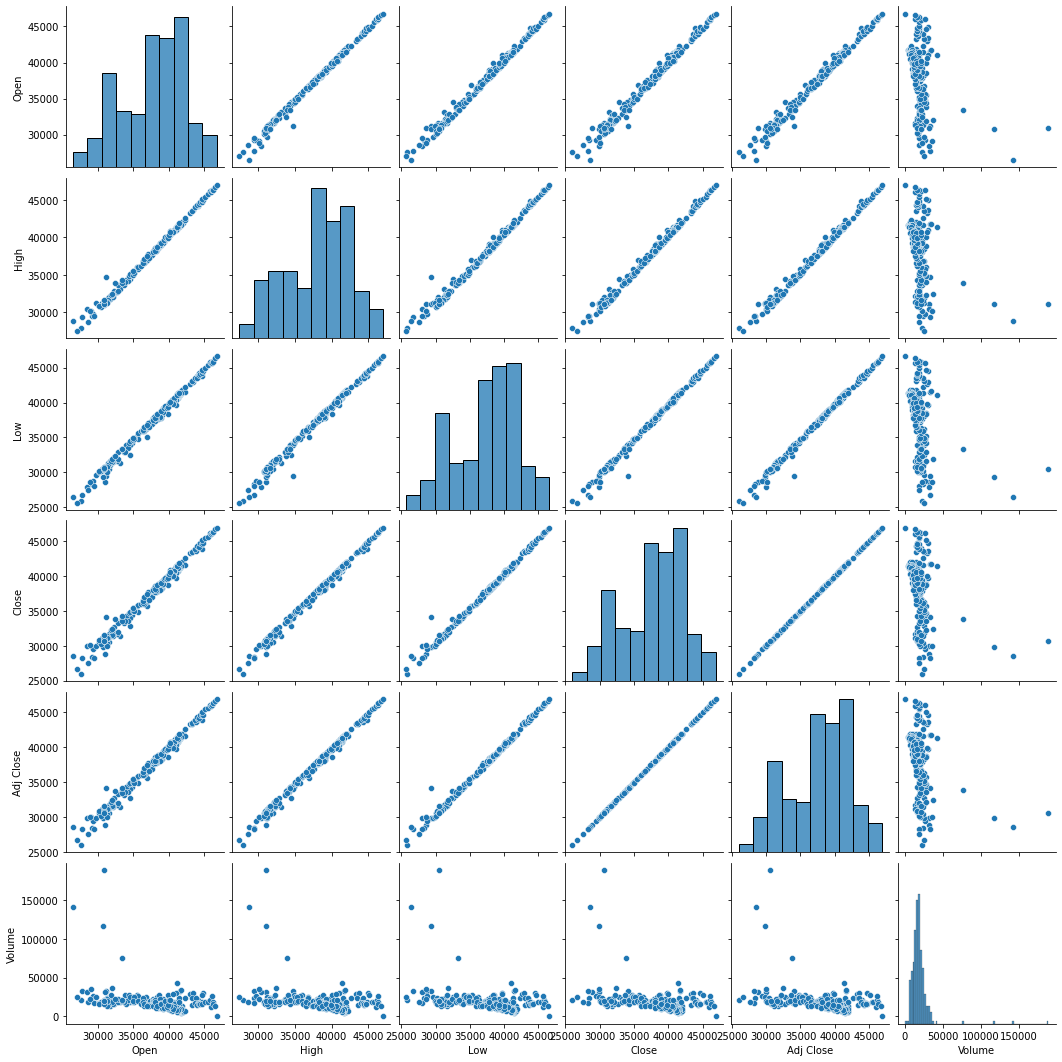

In [15]:
sns.pairplot(df)


In [16]:
np.random.seed(7)

### Additional Analysis

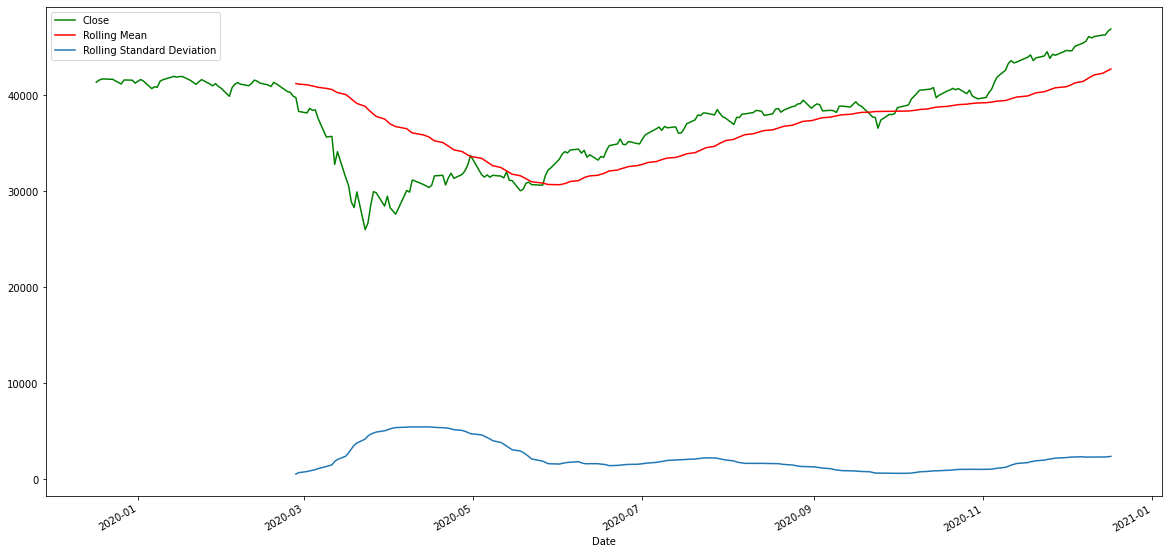

In [17]:
#Plotting moving average
close = df['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
df['Close'].plot(color='g',label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

Text(0.5, 1.0, 'Returns')

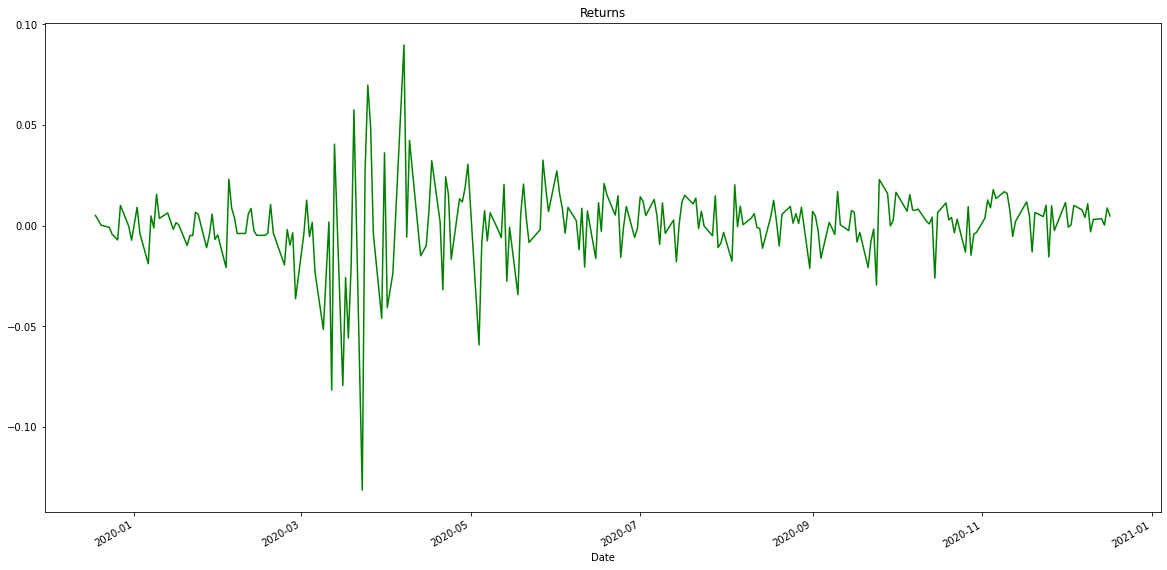

In [18]:
#Plotting the Return
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

### Step 3: Dataframe to store Closing stock data

In [19]:
df2 = pd.read_csv("D:/rimjhim/The Sparks Foundation Internship/Task 7/^BSESN.csv", usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

In [20]:
df2

array([[41352.17],
       [41558.57],
       [41673.92],
       [41681.54],
       [41642.66],
       [41461.26],
       [41163.76],
       [41575.14],
       [41558.  ],
       [41253.74],
       [41626.64],
       [41464.61],
       [40676.63],
       [40869.47],
       [40817.74],
       [41452.35],
       [41599.72],
       [41859.69],
       [41952.63],
       [41872.73],
       [41932.56],
       [41945.37],
       [41528.91],
       [41323.81],
       [41115.38],
       [41386.4 ],
       [41613.19],
       [41155.12],
       [40966.86],
       [41198.66],
       [40913.82],
       [40723.49],
       [39872.31],
       [40789.38],
       [41142.66],
       [41306.03],
       [41141.85],
       [40979.62],
       [41216.14],
       [41565.9 ],
       [41459.79],
       [41257.74],
       [41055.69],
       [40894.38],
       [41323.  ],
       [41170.12],
       [40363.23],
       [40281.2 ],
       [39888.96],
       [39745.66],
       [38297.29],
       [38144.02],
       [3862

In [21]:
df2.shape

(250, 1)

In [35]:
# Converting array values into a dataset matrix
def dataset_matrix(df2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df2)-look_back-1):
        a = df2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

### Step 4: Train Test Split

Normalizing the Dataset: Rescaling real-valued numeric values into a 0 to 1 range

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

In [37]:
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [43]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = dataset_matrix(train, look_back)
testX, testY = dataset_matrix(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## Numerical Analysis

### Long Short Term Memory Network (LSTM)

In [44]:
# Converting array values into a dataset matrix
def dataset_matrix(df2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df2)-look_back-1):
        a = df2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [45]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
163/163 - 3s - loss: 0.0573 - 3s/epoch - 20ms/step
Epoch 2/100
163/163 - 0s - loss: 0.0088 - 264ms/epoch - 2ms/step
Epoch 3/100
163/163 - 0s - loss: 0.0051 - 250ms/epoch - 2ms/step
Epoch 4/100
163/163 - 0s - loss: 0.0028 - 238ms/epoch - 1ms/step
Epoch 5/100
163/163 - 0s - loss: 0.0020 - 235ms/epoch - 1ms/step
Epoch 6/100
163/163 - 0s - loss: 0.0019 - 235ms/epoch - 1ms/step
Epoch 7/100
163/163 - 0s - loss: 0.0018 - 248ms/epoch - 2ms/step
Epoch 8/100
163/163 - 0s - loss: 0.0018 - 281ms/epoch - 2ms/step
Epoch 9/100
163/163 - 0s - loss: 0.0018 - 300ms/epoch - 2ms/step
Epoch 10/100
163/163 - 0s - loss: 0.0020 - 288ms/epoch - 2ms/step
Epoch 11/100
163/163 - 0s - loss: 0.0019 - 283ms/epoch - 2ms/step
Epoch 12/100
163/163 - 0s - loss: 0.0018 - 230ms/epoch - 1ms/step
Epoch 13/100
163/163 - 0s - loss: 0.0019 - 232ms/epoch - 1ms/step
Epoch 14/100
163/163 - 0s - loss: 0.0018 - 234ms/epoch - 1ms/step
Epoch 15/100
163/163 - 0s - loss: 0.0019 - 249ms/epoch - 2ms/step
Epoch 16/100
163/163 

Making Predictions

In [46]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

3/3 [==============================] - 0s 2ms/step


### Step 6: Making Predictions Using the Model

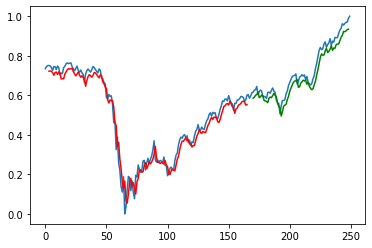

In [47]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [48]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")


Root mean square error =  0.03953976570671428  RMSE
Root mean square error =  0.038553687405783875  RMSE


### Step 7 : Creating a Hybrid model for Numerical and textual Analysis

In [49]:
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('D:/rimjhim/The Sparks Foundation Internship/Task 7/india-news-headlines.csv', names = columns)
news

C:\Users\Rimjhim\AppData\Local\Temp/ipykernel_5236/1851358816.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  news = pd.read_csv('D:/rimjhim/The Sparks Foundation Internship/Task 7/india-news-headlines.csv', names = columns)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [50]:
news.describe

<bound method NDFrame.describe of                  Date                       Category  \
0        publish_date              headline_category   
1            20010102                        unknown   
2            20010102                        unknown   
3            20010102                        unknown   
4            20010102                        unknown   
...               ...                            ...   
3650966      20220331                  city.srinagar   
3650967      20220331  entertainment.hindi.bollywood   
3650968      20220331                    city.trichy   
3650969      20220331                     city.erode   
3650970      20220331                     city.salem   

                                                      News  
0                                            headline_text  
1        Status quo will not be disturbed at Ayodhya; s...  
2                      Fissures in Hurriyat over Pak visit  
3                    America's unwanted heading f

In [51]:
news.shape

(3650971, 3)

In [52]:
news.info

<bound method DataFrame.info of                  Date                       Category  \
0        publish_date              headline_category   
1            20010102                        unknown   
2            20010102                        unknown   
3            20010102                        unknown   
4            20010102                        unknown   
...               ...                            ...   
3650966      20220331                  city.srinagar   
3650967      20220331  entertainment.hindi.bollywood   
3650968      20220331                    city.trichy   
3650969      20220331                     city.erode   
3650970      20220331                     city.salem   

                                                      News  
0                                            headline_text  
1        Status quo will not be disturbed at Ayodhya; s...  
2                      Fissures in Hurriyat over Pak visit  
3                    America's unwanted heading for

In [53]:
news.isnull()

,Date,Category,News
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3650966,False,False,False
3650967,False,False,False
3650968,False,False,False
3650969,False,False,False


In [54]:
news.isnull().sum()

Date        0
Category    0
News        0
dtype: int64

### Step 8: Text Preprocessing

In [55]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 55.7+ MB


In [56]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
3650966,1970-01-01 00:00:00.020220331,J&K sacks 2 cops; 3 other employees over terro...
3650967,1970-01-01 00:00:00.020220331,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,1970-01-01 00:00:00.020220331,As Covid-19 cases drop to nil in southern dist...
3650969,1970-01-01 00:00:00.020220331,Tamil Nadu sees marginal rise of Covid cases w...


In [57]:
#Grouping the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news

,Date,News
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...
...,...,...
7713,1970-01-01 00:00:00.020220327,Playing a dead man in Body God meant sitting i...
7714,1970-01-01 00:00:00.020220328,As fashion becomes democratic; demand for styl...
7715,1970-01-01 00:00:00.020220329,Bobby Deol: Like my dad; I hope to be working ...
7716,1970-01-01 00:00:00.020220330,I will not give in to trends: Dossmode The tim...


In [58]:
news['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7713    Playing a dead man in Body God meant sitting i...
7714    As fashion becomes democratic; demand for styl...
7715    Bobby Deol: Like my dad; I hope to be working ...
7716    I will not give in to trends: Dossmode The tim...
7717    Shashank goes back to coastal Karnataka and Mo...
Name: News, Length: 7718, dtype: object

### Step 9: Adding subjectivity and polarity Scores

In [59]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [60]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

C:\Users\Rimjhim\AppData\Local\Temp/ipykernel_5236/1465704759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Subjectivity'] = news['News'].apply(getSubjectivity)
C:\Users\Rimjhim\AppData\Local\Temp/ipykernel_5236/1465704759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Polarity'] = news['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7713,1970-01-01 00:00:00.020220327,Playing a dead man in Body God meant sitting i...,0.369592,0.025109
7714,1970-01-01 00:00:00.020220328,As fashion becomes democratic; demand for styl...,0.389939,0.055878
7715,1970-01-01 00:00:00.020220329,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198
7716,1970-01-01 00:00:00.020220330,I will not give in to trends: Dossmode The tim...,0.350965,0.037729


### Step 10: Visualizations

<AxesSubplot:>

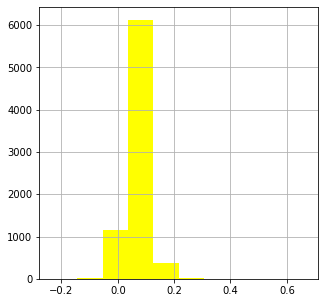

In [61]:
plt.figure(figsize = (5,5))
news['Polarity'].hist(color = 'yellow')

<AxesSubplot:>

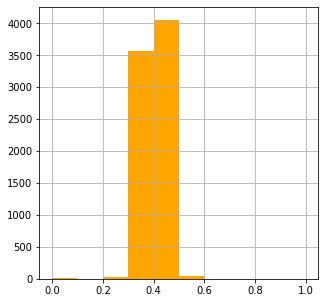

In [62]:
plt.figure(figsize = (5,5))
news['Subjectivity'].hist(color = 'orange')

### Step 11: Sentiment Analysis

In [195]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]
news

In [75]:
news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7713,1970-01-01 00:00:00.020220327,Playing a dead man in Body God meant sitting i...,0.369592,0.025109,-0.9999,0.154,0.764,0.082
7714,1970-01-01 00:00:00.020220328,As fashion becomes democratic; demand for styl...,0.389939,0.055878,-0.9999,0.158,0.742,0.100
7715,1970-01-01 00:00:00.020220329,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198,-0.9999,0.152,0.766,0.082
7716,1970-01-01 00:00:00.020220330,I will not give in to trends: Dossmode The tim...,0.350965,0.037729,-0.9999,0.151,0.775,0.074


### Setp 12: Combining the Data

In [76]:
merge = news
merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7713,1970-01-01 00:00:00.020220327,Playing a dead man in Body God meant sitting i...,0.369592,0.025109,-0.9999,0.154,0.764,0.082
7714,1970-01-01 00:00:00.020220328,As fashion becomes democratic; demand for styl...,0.389939,0.055878,-0.9999,0.158,0.742,0.100
7715,1970-01-01 00:00:00.020220329,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198,-0.9999,0.152,0.766,0.082
7716,1970-01-01 00:00:00.020220330,I will not give in to trends: Dossmode The tim...,0.350965,0.037729,-0.9999,0.151,0.775,0.074


In [77]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...
7713,0.369592,0.025109,-0.9999,0.154,0.764,0.082
7714,0.389939,0.055878,-0.9999,0.158,0.742,0.100
7715,0.404240,0.095198,-0.9999,0.152,0.766,0.082
7716,0.350965,0.037729,-0.9999,0.151,0.775,0.074


In [78]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
1,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
2,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
3,0.476612,0.550397,0.98845,0.279279,0.719,0.258224
4,0.439394,0.535354,0.28925,0.342342,0.704,0.235197


In [165]:
y_scaled=df_min_max_scaled['Close']
y_scaled

0      0.735131
1      0.745002
2      0.750519
3      0.750884
4      0.749024
         ...   
245    0.962154
246    0.969541
247    0.970005
248    0.989293
249    1.000000
Name: Close, Length: 250, dtype: float64

In [166]:
y_scaled.shape

(250,)

In [167]:
new_df

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
1,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
2,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
3,0.476612,0.550397,0.98845,0.279279,0.719,0.258224
4,0.439394,0.535354,0.28925,0.342342,0.704,0.235197
...,...,...,...,...,...,...
7713,0.369592,0.287158,0.00005,0.346847,0.764,0.134868
7714,0.389939,0.321346,0.00005,0.355856,0.742,0.164474
7715,0.404240,0.365034,0.00005,0.342342,0.766,0.134868
7716,0.350965,0.301180,0.00005,0.340090,0.775,0.121711


In [168]:
X = new_df[0:250]
y = df['Close']

In [169]:
y

0      41352.171875
1      41558.570313
2      41673.921875
3      41681.539063
4      41642.660156
           ...     
245    46099.011719
246    46253.460938
247    46263.171875
248    46666.460938
249    46890.339844
Name: Close, Length: 250, dtype: float64

In [170]:
y_scaled

0      0.735131
1      0.745002
2      0.750519
3      0.750884
4      0.749024
         ...   
245    0.962154
246    0.969541
247    0.970005
248    0.989293
249    1.000000
Name: Close, Length: 250, dtype: float64

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train, x_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state = 0)
x_train.shape

(200, 6)

In [173]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
71,0.410909,0.388328,0.85655,0.180180,0.833,0.143092
160,0.340023,0.242115,0.00090,0.337838,0.774,0.125000
180,0.421230,0.376940,0.00200,0.335586,0.738,0.185855
75,0.415278,0.196759,0.03055,0.265766,0.828,0.090461
59,0.493362,0.476381,0.08270,0.376126,0.705,0.210526
101,0.424206,0.369048,0.09630,0.297297,0.758,0.182566
229,0.383692,0.296192,0.00030,0.344595,0.753,0.154605
18,0.410714,0.361523,0.12245,0.297297,0.744,0.203947
188,0.401574,0.370227,0.00135,0.308559,0.745,0.195724
15,0.292222,0.437830,0.92240,0.299550,0.714,0.251645


## Models for hybrid Analysis

### Random Forest Regressor

In [184]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [185]:
print(prediction[:4])
print(y_test[:10])
print("Root mean square error Random Forest= ",math.sqrt(mean_squared_error(prediction,y_test)))

[0.75231207 0.42932686 0.47800061 0.38527422]
225    0.842333
122    0.393456
92     0.272824
157    0.576027
154    0.524095
161    0.592488
198    0.621378
83     0.258180
63     0.110334
155    0.559884
Name: Close, dtype: float64
Root mean square error Random Forest=  0.20437517231873806


In [190]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


In [192]:
b_pred = rf.predict(x_test)

In [193]:
print('MSE =', mse(b_pred, y_test))
print('MAE =', mae(b_pred, y_test))
print('R2 Score =', r2_score(b_pred, y_test))

MSE = 0.04176921106031388
MAE = 0.16923118851539973
R2 Score = -2.516351056869444


### Adaboost Regressor

In [175]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [176]:
print("Mean square error Adaboost = ",math.sqrt(mean_squared_error(predictions, y_test)))

Mean square error Adaboost =  0.1870361740488165


### Decision Tree Regressor

In [177]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [178]:
print(predictions[:4])
print(y_test[:10])
print('Mean Squared error: ',math.sqrt(mean_squared_error(predictions,y_test)))

[0.9386952  0.32229604 0.72380633 0.        ]
225    0.842333
122    0.393456
92     0.272824
157    0.576027
154    0.524095
161    0.592488
198    0.621378
83     0.258180
63     0.110334
155    0.559884
Name: Close, dtype: float64
Mean Squared error:  0.23862185131307995


## Conclusion: 

Comparing the mean squared error values of the three models:

1. Random Forest Regressor: 0.20437517231873806
2. Adaboost Regressor: 0.1870361740488165
3. Decision Tree Regressor: 0.23862185131307995

It can be observed that Adaboost Regressor gives the best performance